# Ex5: Sparse Matrix
## Câu 1:
- Tạo ma trận A(5,5) với các giá trị ngẫu nhiên từ -10 đến 5
- Thay thế tất cả các phần tử <0 bằng 0 trong ma trận A
- Tạo sparse matrix S từ A
- Tính sparsity của sparse matrix

## Câu 2:
- Một trong những ứng dụng thực sự của ma trận thưa thớt là giảm không gian rất lớn để lưu trữ ma trận thưa thớt. 
- Hãy tạo ra một ma trận BigA(1000, 1000) phần tử ngẫu nhiên tử -10 đến 5.
- Thay thế tất cả các phần tử <0 bằng 0 trong ma trận BigA
- Tính kích thước của ma trận BigA
- Tạo sparse matrix BigS từ BigA
- Tích kích thước của BigS
- Tính sparsity của sparse matrix
- Trực quan hóa BigS

## Câu 3: 
- Tạo ma trận thưa thớt ngẫu nhiên S(5,5) với mật độ cụ thể density = 0.25.
- Ghi chú: 
    - Giá trị mật độ (Density value) có nghĩa là ma trận được tạo là một full matrix với density = 0 có nghĩa là ma trận được tạo ra không có các item khác 0. Tương tự, density = 0.5 có nghĩa là ma trận có 50% số item khác 0.
- Chuyển S thành full matrix A
- Tạo ma trận thưa thớt ngẫu nhiên S1(5,5) với mật độ cụ thể density = 0.25 và item khác 0 sẽ bằng 1
- Chuyển S1 thành full matrix A1
- Trực quan hóa S, S1

## Câu 1: Gợi ý

In [1]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse import csr_matrix
from lib import create_matrix_random
import matplotlib.pyplot as plt

In [2]:
A = create_matrix_random(5, 5, -10, 5)
A

array([[ -6,   4,   6,   0,  -2],
       [  6,  -8,   4,  -6,  -5],
       [ -9, -10,  -1, -10,  -3],
       [ -2,   6, -10, -10,   3],
       [  2,   3,   2,   2,  -8]])

In [3]:
A[A < 0] = 0
A

array([[0, 4, 6, 0, 0],
       [6, 0, 4, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 6, 0, 0, 3],
       [2, 3, 2, 2, 0]])

In [4]:
S = csr_matrix(A)
print(S)

  (0, 1)	4
  (0, 2)	6
  (1, 0)	6
  (1, 2)	4
  (3, 1)	6
  (3, 4)	3
  (4, 0)	2
  (4, 1)	3
  (4, 2)	2
  (4, 3)	2


In [5]:
sparsity = 1.0 - np.count_nonzero(A)/A.size
sparsity

0.6

## Câu 2: Gợi ý
- Một trong những ứng dụng thực sự của ma trận thưa thớt là giảm không gian rất lớn để lưu trữ ma trận thưa thớt. 
- Hãy tạo ra một ma trận BigA(1000, 1000) phần tử ngẫu nhiên tử -10 đến 5.
- Thay thế tất cả các phần tử <0 bằng 0 trong ma trận BigA
- Tính kích thước của ma trận BigA
- Tạo sparse matrix BigS từ BigA
- Tích kích thước của BigS
- Tính sparsity của sparse matrix
- Trực quan hóa BigS

In [6]:
BigA = create_matrix_random(1000, 1000, -10, 5)
BigA

array([[ -1,  -9,   1, ...,  -8,  -7,   2],
       [-10,   4,  -4, ...,  -9,   0,  -8],
       [ -5,   3,   4, ...,  -4,   4,   3],
       ...,
       [  1,  -1,   0, ..., -10,  -7,   3],
       [  1,  -5,  -2, ...,   4,  -9,  -2],
       [ -2,  -6,   5, ...,  -7,   5,  -8]])

In [7]:
BigA[BigA < 0] = 0
BigA

array([[0, 0, 1, ..., 0, 0, 2],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 3, 4, ..., 0, 4, 3],
       ...,
       [1, 0, 0, ..., 0, 0, 3],
       [1, 0, 0, ..., 4, 0, 0],
       [0, 0, 5, ..., 0, 5, 0]])

In [8]:
BigA.nbytes

4000000

In [9]:
BigA_size = BigA.nbytes/(1024**2)
print('Size of full matrix with zeros:', BigA_size ,'MB')

Size of full matrix with zeros: 3.814697265625 MB


In [10]:
BigS = csr_matrix(BigA)
BigS.data.nbytes

1410816

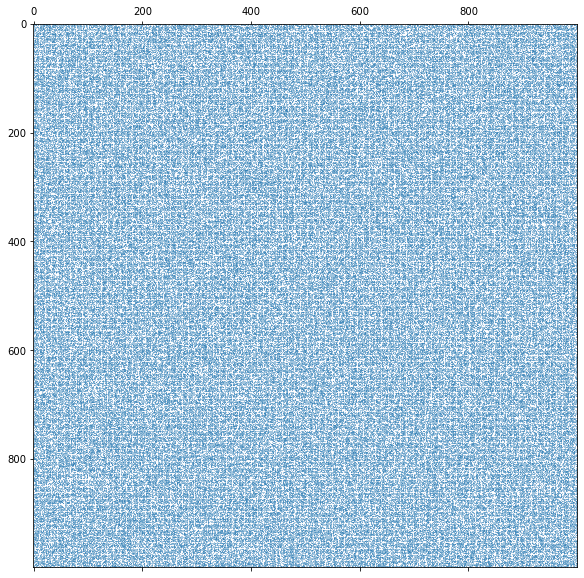

In [11]:
plt.figure(figsize=(10,10))
plt.spy(BigS, markersize=0.1)

In [12]:
BigS_size = BigS.data.nbytes/(1024**2)
print('Size of sparse csr_matrix:', BigS_size ,'MB')

Size of sparse csr_matrix: 1.345458984375 MB


In [13]:
# https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/

## Câu 3: Gợi ý
- Tạo ma trận thưa thớt ngẫu nhiên S(5,5) với mật độ cụ thể density = 0.25.
- Ghi chú: 
    - Giá trị mật độ (Density value) có nghĩa là ma trận được tạo là một full matrix với density = 0 có nghĩa là ma trận được tạo ra không có các item khác 0. Tương tự, density = 0.5 có nghĩa là ma trận có 50% số item khác 0.
- Chuyển S thành full matrix A
- Tạo ma trận thưa thớt ngẫu nhiên S1(5,5) với mật độ cụ thể density = 0.25 và item khác 0 sẽ bằng 1
- Chuyển S1 thành full matrix A1
- Trực quan hóa S, S1

In [14]:
import scipy.sparse as sparse
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# set random seed to repeat
np.random.seed(42)
# create sparse matrix with density 0.25
S = sparse.random(5, 5, density=0.25)
print(S)

  (3, 1)	0.3042422429595377
  (1, 3)	0.5247564316322378
  (0, 0)	0.43194501864211576
  (3, 4)	0.2912291401980419
  (1, 2)	0.6118528947223795
  (4, 1)	0.13949386065204183


In [16]:
# Convert the sparse matrix to a full matrix
A = S.toarray()
A

array([[0.43194502, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.61185289, 0.52475643, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.30424224, 0.        , 0.        , 0.29122914],
       [0.        , 0.13949386, 0.        , 0.        , 0.        ]])

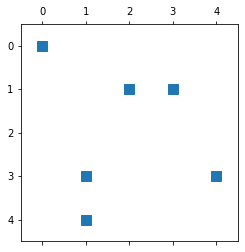

In [17]:
plt.spy(S)

In [18]:
# create sparse matrix with density 0.25
S1 = sparse.random(5, 5, density=0.25, data_rvs=np.ones)
print(S1)

  (0, 0)	1.0
  (0, 1)	1.0
  (1, 4)	1.0
  (3, 2)	1.0
  (0, 4)	1.0
  (2, 1)	1.0


In [19]:
A1 = S1.toarray()
A1

array([[1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

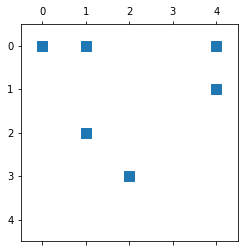

In [20]:
plt.spy(S1)

In [21]:
# link: https://cmdlinetips.com/2019/02/how-to-create-random-sparse-matrix-of-specific-density/